In [1]:
import platform
print(platform.python_version())
# The Python version I used is "3.8.12".

3.8.12


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## This workbook serves as a work sample only. Do NOT reset kernel and/or rerun any Python-coded cells.
### Please be advised that I don't publicly make available the datasets used in this notebook.

In [ ]:
# df = pd.read_csv('raw_eft.csv')

### Exploratory Data Analysis

In [5]:
df.shape

(137067, 6)

In [6]:
df.head()

,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DECRIPTION,TIME_SEQ
0,3300125,21-Jul-20,108880.95,CM,Deposit,8:44:26
1,2616067,21-Jul-20,-1200000.00,DM,Funds Wired to/from,10:09:05
2,3233547,21-Jul-20,-15000.00,DM,Funds Wired to/from,15:18:22
3,2372206,21-Jul-20,362452.27,CM,Funds Wired to/from,12:11:03
4,2274624,21-Jul-20,217794.43,CM,Funds Wired to/from,11:34:49


In [7]:
# Explore last few rows of the dataset
df.tail()

,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DECRIPTION,TIME_SEQ
137062,2352544,30-Sep-20,309064.54,CM,Advanced,13:05:13
137063,2352544,30-Sep-20,211355.60,CM,Advanced,14:24:26
137064,3224380,30-Sep-20,-35882.74,DM,Debit Memo,15:57:09
137065,3114712,30-Sep-20,-375.00,DM,Discharge Administration Fee,14:22:34
137066,2963121,30-Sep-20,-77.31,DM,Registration Cost,13:05:51


In [8]:
# TRANSACTION_DECRIPTION should probably be TRANSACTION_DESCRIPTION (correct spelling). Let's rename it.
df.rename(columns={'TRANSACTION_DECRIPTION': 'TRANSACTION_DESCRIPTION'}, inplace=True)

In [9]:
# Display basic information about the dataset, including data types.
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137067 entries, 0 to 137066
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CIF                      137067 non-null  int64  
 1   EFFECTIVE_DATE           137067 non-null  object 
 2   TRANSACTION_AMOUNT       137067 non-null  float64
 3   TRANSACTION_CODE         137067 non-null  object 
 4   TRANSACTION_DESCRIPTION  137067 non-null  object 
 5   TIME_SEQ                 137067 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.3+ MB
None


In [10]:
# Need to convert EFFECTIVE_DATE data type to DATE and TIME_SEQ data type to TIME for further analysis.
# Also, combine the two columns to make a DATETIME data field.
df['EFFECTIVE_DATE'] = pd.to_datetime(df['EFFECTIVE_DATE'])
# Add new columns for year, month, and day for further analysis
df['YEAR'] = df['EFFECTIVE_DATE'].dt.year
df['MONTH'] = df['EFFECTIVE_DATE'].dt.month
df['DAY'] = df['EFFECTIVE_DATE'].dt.day
# Convert EFFECTIVE_DATE and TIME_SEQ to datetime by creating a datetime column for easier handling of timestamps
df['TIME_SEQ'] = pd.to_datetime(df['TIME_SEQ'], format='%H:%M:%S').dt.time
# Create a datetime column for easier handling of timestamps
df['DATETIME'] = pd.to_datetime(df['EFFECTIVE_DATE'].astype(str) + ' ' + df['TIME_SEQ'].astype(str))

In [11]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())



Summary Statistics for Numerical Columns:
                CIF  TRANSACTION_AMOUNT           YEAR          MONTH  \
count  1.370670e+05        1.370670e+05  137067.000000  137067.000000   
mean   2.673306e+06        2.221759e+04    2019.732532       6.574858   
std    4.014401e+05        1.303791e+06       0.442640       3.510160   
min    0.000000e+00       -1.283554e+08    2019.000000       1.000000   
25%    2.339056e+06       -1.000000e+03    2019.000000       3.000000   
50%    2.648257e+06       -1.700000e-01    2020.000000       7.000000   
75%    3.051645e+06        1.000000e+03    2020.000000      10.000000   
max    3.312160e+06        1.225305e+08    2020.000000      12.000000   

                 DAY  
count  137067.000000  
mean       14.487382  
std         9.187322  
min         1.000000  
25%         6.000000  
50%        14.000000  
75%        22.000000  
max        31.000000  


In [12]:
# Let's see what the audit period is via EFFECTIVE_DATE
print("Audit Period: {} to {}".format(df['EFFECTIVE_DATE'].dt.date.min(), df['EFFECTIVE_DATE'].dt.date.max()))

Audit Period: 2019-10-01 to 2020-09-30


In [13]:
# Check for missing values in the dataset. The df.info() also gives non-null results
# , but I often run the df.isnull().sum() just to be sure.

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
CIF                        0
EFFECTIVE_DATE             0
TRANSACTION_AMOUNT         0
TRANSACTION_CODE           0
TRANSACTION_DESCRIPTION    0
TIME_SEQ                   0
YEAR                       0
MONTH                      0
DAY                        0
DATETIME                   0
dtype: int64


In [14]:
# Check for unique values in categorical columns
print("\nUnique Values in Categorical Columns:\n")
print(df['TRANSACTION_CODE'].value_counts())
print("\n")
print(df['TRANSACTION_DESCRIPTION'].value_counts())


Unique Values in Categorical Columns:

DM    72564
CM    64503
Name: TRANSACTION_CODE, dtype: int64


Funds Wired to/from              21382
Returned Item                    12768
Credit Memo                      10892
Debit Memo                        9815
Advance                           7177
                                 ...  
One Account Payment                  1
REV One Account Payment              1
REV Reverse Bank Confirmation        1
Reverse Bank Confirmation            1
Voucher Search                       1
Name: TRANSACTION_DESCRIPTION, Length: 128, dtype: int64


In [15]:
len(df['TRANSACTION_DESCRIPTION'].value_counts())

128

In [16]:
# There are only 128 unique descriptions in TRANSACTION_DESCRIPTION. Not bad to print them all to scan through them.
for desc, count in df['TRANSACTION_DESCRIPTION'].value_counts().items():
    print(desc + ": " + str(count))

Funds Wired to/from: 21382
Returned Item: 12768
Credit Memo: 10892
Debit Memo: 9815
Advance: 7177
Registration Cost: 6063
Adjustment: 6009
Rev. External Transfer: 5981
Discharge Administration Fee: 5218
Misc Service Charge: 4224
Deposit: 4153
REV Elect. Funds Transfer: 4147
ABM Adjustment: 4005
U.S. Wire Transfer: 3915
REV Misc Service Charge: 3710
Rev. Bill Payment: 3658
Mobile Deposit Adjustment: 3515
Promotion: 2876
Advanced: 2632
International Wire: 2475
Legal Fees: 2143
Invalid Cheque Fee: 1393
Rev. Official Cheque: 612
Elect. Funds Transfer: 605
Rev. Deposit: 581
Interest Adjustment: 559
LOC Fee: 519
Card Adjustment: 485
REV LOC Payment: 402
Underwriting HST: 397
Underwriting Fee - M-One: 396
REV Funds Wired to/from: 244
REV Returned Item: 217
Underwriting Fee - Select: 203
Clear Elect. Funds Transfer: 197
Insurance + PST: 190
Write-off: 175
Wire Transfer Fee: 169
REV Advance: 169
REV Credit Memo: 166
REV Debit Memo: 146
REV ABM Adjustment: 120
POS Adjustment: 117
US Internationa

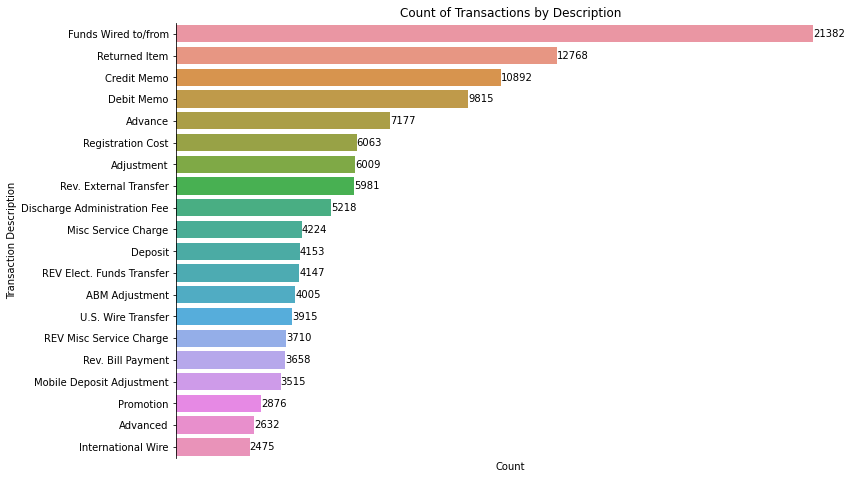

In [17]:
# Plot the count of transactions by top 20 transaction descriptions
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='TRANSACTION_DESCRIPTION', data=df, order=df['TRANSACTION_DESCRIPTION'].value_counts().nlargest(20).index)
plt.title('Count of Transactions by Description')
plt.xlabel('Count')
plt.ylabel('Transaction Description')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
plt.show()

In [18]:
# Not all transactions are EFT-SWIFT. Assume only international wire transactions are EFT-SWIFT transactions.
EFT_SWIFT_types = [desc for desc in df['TRANSACTION_DESCRIPTION'].value_counts().index if 'International' in desc]
len(EFT_SWIFT_types)

5

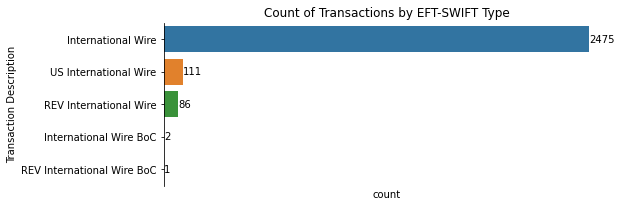

In [19]:
# There are five transaction descriptions related to international wire.
# Plot the count of transactions with EFT_SWIFT_types
plt.figure(figsize=(8, 3))
ax = sns.countplot(y='TRANSACTION_DESCRIPTION', data=df[df['TRANSACTION_DESCRIPTION'].isin(EFT_SWIFT_types)], order=df[df['TRANSACTION_DESCRIPTION'].isin(EFT_SWIFT_types)]['TRANSACTION_DESCRIPTION'].value_counts().index)
plt.title('Count of Transactions by EFT-SWIFT Type')
plt.ylabel('Transaction Description')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
# Removing the borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
plt.show()

In [20]:
# Summary statistics for TRANSACTION_AMOUNT grouped by TRANSACTION_CODE
print("\nSummary Statistics for TRANSACTION_AMOUNT by TRANSACTION_CODE:")
print(df.groupby('TRANSACTION_CODE')['TRANSACTION_AMOUNT'].describe())


Summary Statistics for TRANSACTION_AMOUNT by TRANSACTION_CODE:
                    count           mean           std           min  \
TRANSACTION_CODE                                                       
CM                64503.0  158131.037968  1.357558e+06 -6.224909e+07   
DM                72564.0  -98597.491315  1.241643e+06 -1.283554e+08   

                        25%      50%       75%           max  
TRANSACTION_CODE                                              
CM                   37.595  1000.00  37000.00  1.225305e+08  
DM               -18693.585  -708.69    -77.31  5.974025e+07  


In [21]:
# Both the Credit Memo (CM) and Debit Memo (DM) have transaction amounts in different signs.
# This makes sense in Accounting since there are reversal transactions (REV... transaction descriptions).

# From the head and tail of the dataset, CM transaction amounts in general are positive while those of DM are negative.
# Create a new column for absolute transaction amounts for later analysis.
df['TRANSACTION_AMOUNT_ABS'] = df['TRANSACTION_AMOUNT'].abs()

# The stats shows huge ranges of transaction amounts for both CM and DM transactions.
# Expect to see large transaction amount.
# The boxplots below show that the interquartile ranges are tiny compared to the max and min.

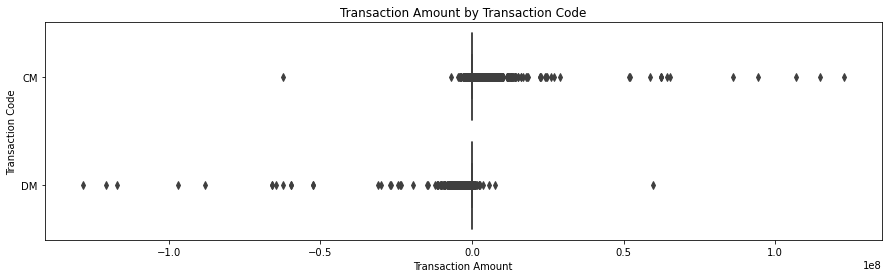

In [22]:
# Plot transaction amount by TRANSACTION_CODE
# I know that there are certain USD transactions, but for this plot of all transaction descs, just raw amounts are used.
# There will be boxes later for CAD conversion absolute amounts.
plt.figure(figsize=(15, 4))
sns.boxplot(y='TRANSACTION_CODE', x='TRANSACTION_AMOUNT', data=df)
plt.title('Transaction Amount by Transaction Code')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Code')
plt.show()

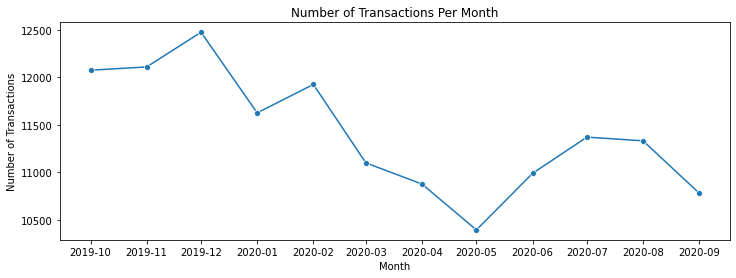

In [23]:
# Plot number of transactions per month
from matplotlib.dates import MonthLocator
monthly_transactions = df.groupby(['YEAR', 'MONTH']).size().reset_index(name='count')
plt.figure(figsize=(12, 4))
sns.lineplot(x=pd.to_datetime(monthly_transactions[['YEAR', 'MONTH']].assign(DAY=1)), y='count', data=monthly_transactions, marker='o')
plt.title('Number of Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.show()

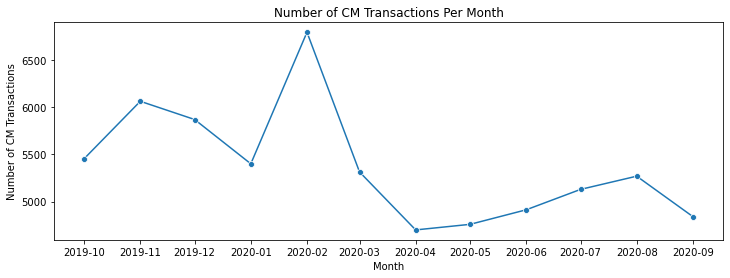

In [24]:
# Plot number of CM transactions per month
from matplotlib.dates import MonthLocator
monthly_transactions = df[df['TRANSACTION_CODE']=='CM'].groupby(['YEAR', 'MONTH']).size().reset_index(name='count')
plt.figure(figsize=(12, 4))
sns.lineplot(x=pd.to_datetime(monthly_transactions[['YEAR', 'MONTH']].assign(DAY=1)), y='count', data=monthly_transactions, marker='o')
plt.title('Number of CM Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of CM Transactions')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.show()

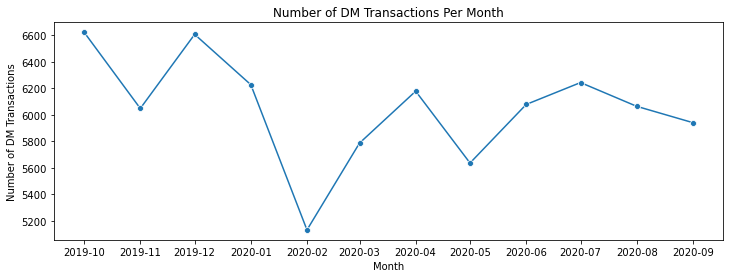

In [25]:
# Plot number of DM transactions per month
from matplotlib.dates import MonthLocator
monthly_transactions = df[df['TRANSACTION_CODE']=='DM'].groupby(['YEAR', 'MONTH']).size().reset_index(name='count')
plt.figure(figsize=(12, 4))
sns.lineplot(x=pd.to_datetime(monthly_transactions[['YEAR', 'MONTH']].assign(DAY=1)), y='count', data=monthly_transactions, marker='o')
plt.title('Number of DM Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of DM Transactions')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.show()

In [26]:
# Observations and Insights so far
print("\nObservations and Insights:")
print("- The dataset contains 137,067 records with various transaction details.")
print("- There are two transaction codes: CM and DM, with varying amounts and descriptions.")
print("- Some transaction descriptions appear more frequently than others.")
print("- The transaction amounts show a wide range and include some outliers.")
print("- There is a noticeable trend in the number of transactions over different months.")


Observations and Insights:
- The dataset contains 137,067 records with various transaction details.
- There are two transaction codes: CM and DM, with varying amounts and descriptions.
- Some transaction descriptions appear more frequently than others.
- The transaction amounts show a wide range and include some outliers.
- There is a noticeable trend in the number of transactions over different months.


In [27]:
# Calculate total transaction amounts by CIF
total_transaction_by_client = df.groupby('CIF')['TRANSACTION_AMOUNT_ABS'].sum().reset_index()
total_transaction_by_client.columns = ['CIF', 'TOTAL_TRANSACTION_AMOUNT']

In [28]:
# Get the top 10 clients with the largest total transaction amounts
top_10_clients = total_transaction_by_client.nlargest(10, 'TOTAL_TRANSACTION_AMOUNT')

In [29]:
# Filter the dataset to include only the top 10 clients
df_top_clients = df[df['CIF'].isin(top_10_clients['CIF'])]

<Figure size 1080x720 with 0 Axes>

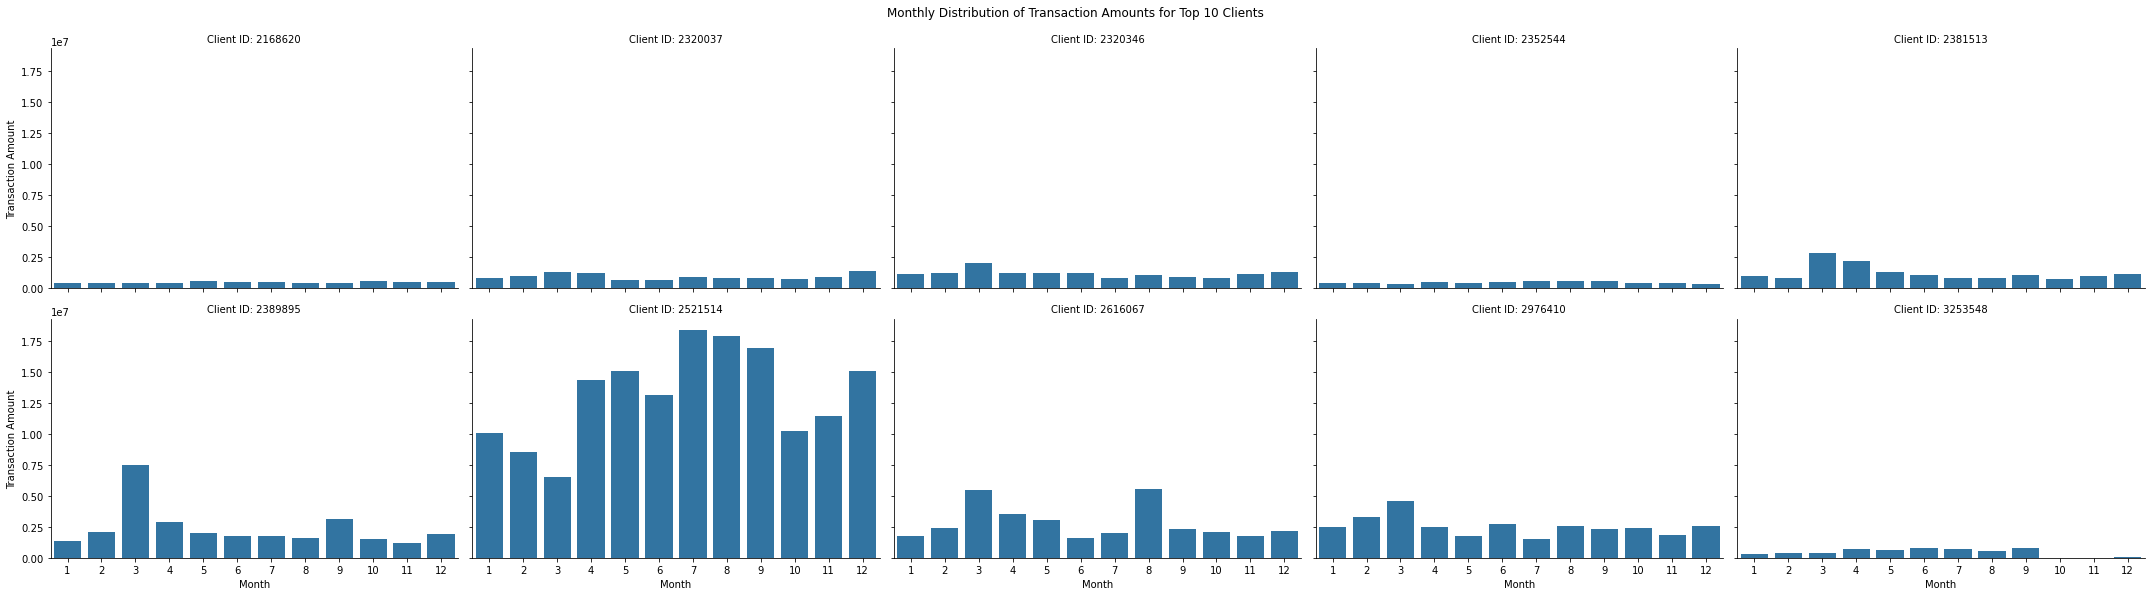

In [30]:
# Plot the monthly distributions of the top 10 clients
plt.figure(figsize=(15, 10))
# Create a FacetGrid for better visualization
g = sns.FacetGrid(df_top_clients, col='CIF', col_wrap=5, height=4, aspect=1.5)
g.map(sns.barplot, 'MONTH', 'TRANSACTION_AMOUNT_ABS', order=list(range(1, 13)), ci=None)
# Add titles and labels
g.set_axis_labels('Month', 'Transaction Amount')
g.set_titles('Client ID: {col_name}')
g.fig.suptitle('Monthly Distribution of Transaction Amounts for Top 10 Clients', y=1.03)
plt.show()

In [31]:
# Extract the hour from TIME_SEQ column
df['HOUR'] = pd.to_datetime(df['TIME_SEQ'], format='%H:%M:%S').dt.hour

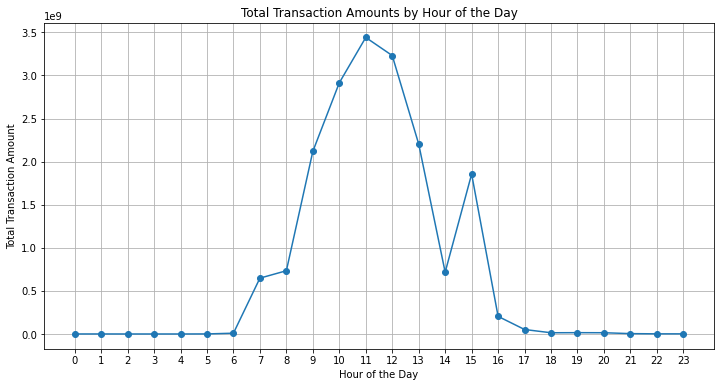

In [32]:
# Plot the total transaction amounts by hour
total_transaction_by_hour = df.groupby('HOUR')['TRANSACTION_AMOUNT_ABS'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(total_transaction_by_hour['HOUR'], total_transaction_by_hour['TRANSACTION_AMOUNT_ABS'], marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Transaction Amount')
plt.title('Total Transaction Amounts by Hour of the Day')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

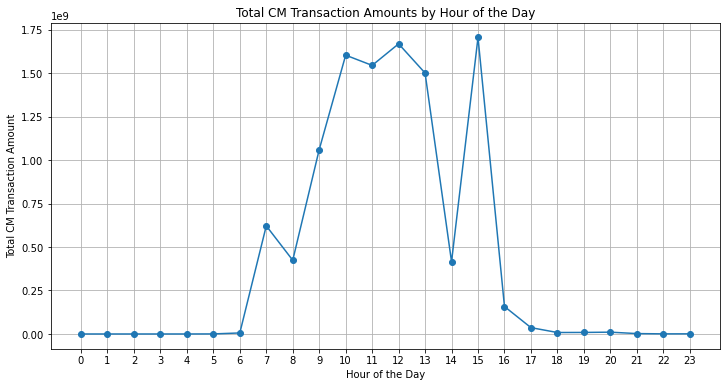

In [33]:
# Plot the total CM transaction amounts by hour
total_CM_transaction_by_hour = df[df['TRANSACTION_CODE']=='CM'].groupby('HOUR')['TRANSACTION_AMOUNT_ABS'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(total_CM_transaction_by_hour['HOUR'], total_CM_transaction_by_hour['TRANSACTION_AMOUNT_ABS'], marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total CM Transaction Amount')
plt.title('Total CM Transaction Amounts by Hour of the Day')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

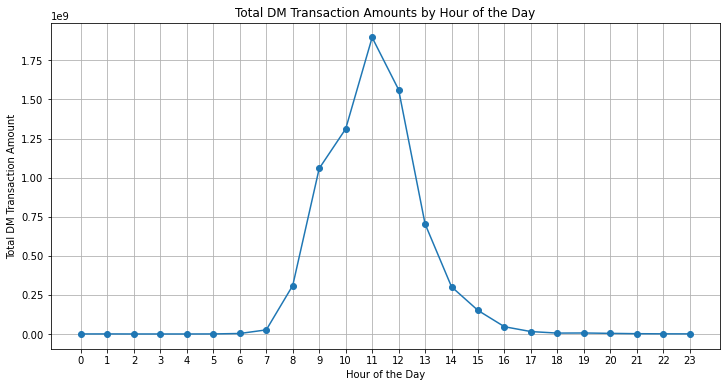

In [34]:
# Plot the total DM transaction amounts by hour
total_DM_transaction_by_hour = df[df['TRANSACTION_CODE']=='DM'].groupby('HOUR')['TRANSACTION_AMOUNT_ABS'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(total_DM_transaction_by_hour['HOUR'], total_DM_transaction_by_hour['TRANSACTION_AMOUNT_ABS'], marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total DM Transaction Amount')
plt.title('Total DM Transaction Amounts by Hour of the Day')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

### Independently determine EFT-SWIFT transactions that must be reported to FINTRAC according to regulatory requirements

In [36]:
# Create a DataFrame copy of EFT-SWIFT transactions to then find EFT-SWIFT transactions that must be reported to FINTRAC  
EFT_SWIFT_df = df[df['TRANSACTION_DESCRIPTION'].isin(EFT_SWIFT_types)].copy()
# Since there are US International Wire transactions, their transaction amounts need converting from USD to CAD
# for later comparison to the threshold of $10,000.
# The fintrac_reported.xlsx confirms that there are USD transactions.
# Data mapping later can tell they are of US International Wire ones.
EFT_SWIFT_df.head()

,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ,YEAR,MONTH,DAY,DATETIME,TRANSACTION_AMOUNT_ABS,HOUR
14,2462805,2020-07-24,16161.13,CM,International Wire,11:46:44,2020,7,24,2020-07-24 11:46:44,16161.13,11
16,2495504,2020-07-24,60.99,CM,International Wire,10:35:41,2020,7,24,2020-07-24 10:35:41,60.99,10
56,2674126,2020-07-13,-13200.00,DM,International Wire,11:11:07,2020,7,13,2020-07-13 11:11:07,13200.00,11
70,2149604,2020-07-16,-27549.56,DM,International Wire,15:50:45,2020,7,16,2020-07-16 15:50:45,27549.56,15
104,3043238,2020-07-16,-4781.10,DM,International Wire,15:54:25,2020,7,16,2020-07-16 15:54:25,4781.10,15


In [37]:
# With the Audit Period: 2019-10-01 to 2020-09-30 and that exchange rates are not provided in the dataset,
# for simplicity, I use the avg. USD/CAD rate of 1.3457 after averaging daily FX rates provided by BoC for the audit period.
# FX USD to CAD: 1.3457
EFT_SWIFT_df['CAD_AMOUNT_ABS'] = np.where(EFT_SWIFT_df['TRANSACTION_DESCRIPTION']=='US International Wire', EFT_SWIFT_df['TRANSACTION_AMOUNT'].abs()*1.3457, EFT_SWIFT_df['TRANSACTION_AMOUNT'].abs())

In [38]:
# Summary statistics for CAD CONVERTED TRANSACTION (ABSOLUTE) AMOUNT grouped by TRANSACTION_CODE
print(EFT_SWIFT_df.groupby('TRANSACTION_CODE')['CAD_AMOUNT_ABS'].describe())

                   count          mean           std   min      25%      50%  \
TRANSACTION_CODE                                                               
CM                1573.0  20027.359422  86115.362652  15.0   885.20  4214.00   
DM                1102.0  31966.284315  90044.739534  30.0  2176.41  6078.99   

                      75%        max  
TRANSACTION_CODE                      
CM                11500.0  2287690.0  
DM                20907.6  1317892.0  


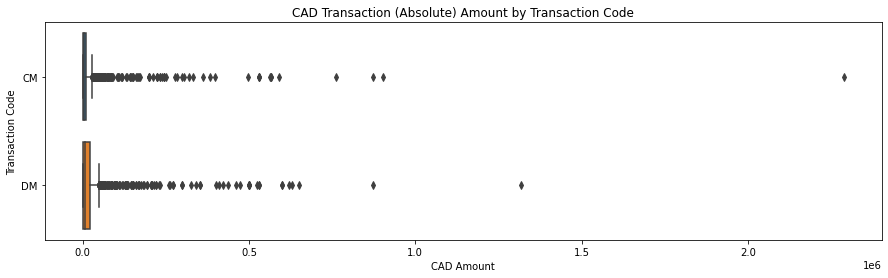

In [39]:
# Boxplot EFT-SWIFT converted transaction absolute amounts by TRANSACTION_CODE
# As expected, transactions with large amounts make the means much larger than the medians shown in the statistics summary.
plt.figure(figsize=(15, 4))
sns.boxplot(y='TRANSACTION_CODE', x='CAD_AMOUNT_ABS', data=EFT_SWIFT_df)
plt.title('CAD Transaction (Absolute) Amount by Transaction Code')
plt.xlabel('CAD Amount')
plt.ylabel('Transaction Code')
plt.show()

### Identify single transactions exceeding $10,000 with specific descriptions

In [40]:
# Identify single transactions exceeding $10,000 with specific descriptions
single_transactions_df = EFT_SWIFT_df[EFT_SWIFT_df['CAD_AMOUNT_ABS'] >= 10000].copy()

print("Single EFT-SWIFT transactions of $10,000 or more:")
single_transactions_df


Single EFT-SWIFT transactions of $10,000 or more:


,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ,YEAR,MONTH,DAY,DATETIME,TRANSACTION_AMOUNT_ABS,HOUR,CAD_AMOUNT_ABS
14,2462805,2020-07-24,16161.13,CM,International Wire,11:46:44,2020,7,24,2020-07-24 11:46:44,16161.13,11,16161.130000
56,2674126,2020-07-13,-13200.00,DM,International Wire,11:11:07,2020,7,13,2020-07-13 11:11:07,13200.00,11,13200.000000
70,2149604,2020-07-16,-27549.56,DM,International Wire,15:50:45,2020,7,16,2020-07-16 15:50:45,27549.56,15,27549.560000
106,2638391,2020-07-16,-15937.00,DM,International Wire,09:57:21,2020,7,16,2020-07-16 09:57:21,15937.00,9,15937.000000
298,3292029,2020-07-30,28724.61,CM,International Wire,11:01:12,2020,7,30,2020-07-30 11:01:12,28724.61,11,28724.610000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136441,2829976,2020-09-29,25942.52,CM,International Wire,16:14:47,2020,9,29,2020-09-29 16:14:47,25942.52,16,25942.520000
136578,2625588,2020-09-29,18344.72,CM,International Wire,10:10:40,2020,9,29,2020-09-29 10:10:40,18344.72,10,18344.720000
136840,2374750,2020-09-30,-58515.92,DM,US International Wire,11:17:27,2020,9,30,2020-09-30 11:17:27,58515.92,11,78744.873544
137038,2158848,2020-09-30,-10255.36,DM,International Wire,10:02:23,2020,9,30,2020-09-30 10:02:23,10255.36,10,10255.360000


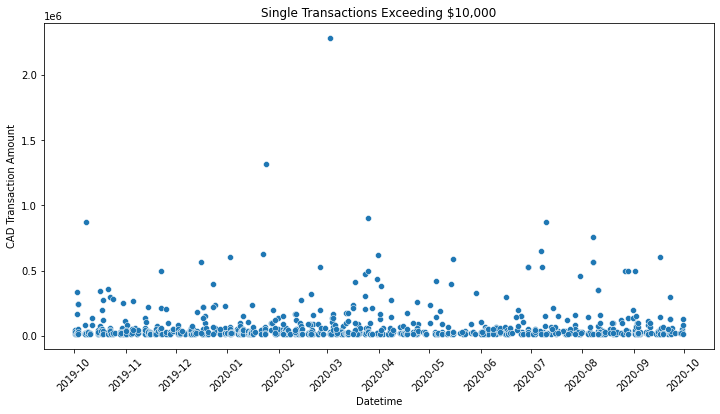

In [41]:
# Plotting single transactions exceeding $10,000. There some very large amount transactions.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=single_transactions_df, x='DATETIME', y='CAD_AMOUNT_ABS')
plt.xlabel('Datetime')
plt.ylabel('CAD Transaction Amount')
plt.title('Single Transactions Exceeding $10,000')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.show()


### Identify combinations of transactions within 24 hours exceeding $10,000

In [42]:
# Filter for EFT-SWIFT transactions with amounts less than $10,000
# Sort the filtering result by datetime and CIF
# Then create dataframe copy named sorted_df, reset its index and retain the original index as a data field.
sorted_df = EFT_SWIFT_df[EFT_SWIFT_df['CAD_AMOUNT_ABS'] < 10000].sort_values(['DATETIME', 'CIF'], ascending=[True, True]).copy()
sorted_df.reset_index(inplace=True)
sorted_df.rename(columns={'index': 'original_index'}, inplace=True)
sorted_df.head()

,original_index,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ,YEAR,MONTH,DAY,DATETIME,TRANSACTION_AMOUNT_ABS,HOUR,CAD_AMOUNT_ABS
0,3642,3100534,2019-10-01,444.51,CM,International Wire,08:19:42,2019,10,1,2019-10-01 08:19:42,444.51,8,444.51
1,1900,2645833,2019-10-01,3000.00,CM,International Wire,08:26:10,2019,10,1,2019-10-01 08:26:10,3000.00,8,3000.00
2,2049,2266328,2019-10-01,1000.00,CM,International Wire,08:47:35,2019,10,1,2019-10-01 08:47:35,1000.00,8,1000.00
3,3380,2126422,2019-10-01,-2182.77,DM,International Wire,11:26:21,2019,10,1,2019-10-01 11:26:21,2182.77,11,2182.77
4,3713,2386831,2019-10-01,430.14,CM,International Wire,11:53:39,2019,10,1,2019-10-01 11:53:39,430.14,11,430.14


In [43]:
sorted_df.tail()

,original_index,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ,YEAR,MONTH,DAY,DATETIME,TRANSACTION_AMOUNT_ABS,HOUR,CAD_AMOUNT_ABS
1777,136247,2425304,2020-09-29,226.48,CM,International Wire,09:45:43,2020,9,29,2020-09-29 09:45:43,226.48,9,226.48
1778,136307,2645833,2020-09-29,3000.00,CM,International Wire,09:47:28,2020,9,29,2020-09-29 09:47:28,3000.00,9,3000.00
1779,136589,3292029,2020-09-29,3977.09,CM,International Wire,09:53:44,2020,9,29,2020-09-29 09:53:44,3977.09,9,3977.09
1780,136585,3292029,2020-09-29,9149.76,CM,International Wire,09:59:32,2020,9,29,2020-09-29 09:59:32,9149.76,9,9149.76
1781,136935,2659416,2020-09-30,-916.50,DM,International Wire,10:01:08,2020,9,30,2020-09-30 10:01:08,916.50,10,916.50


In [44]:
# Function to find two or more transactions within 24 hours (86400 seconds) exceeding $10,000 in total from the same CIF
def find_transaction_combinations(data, threshold=10000):
    results = []
    # The content of this function is hidden on purpose. If you are curious about the algorithm and implementation, let me know.
    return results

In [45]:
# Group the sorted_df by CIF and find the combinations of two of more transactions for each group exceeding $10,000
# by applying the function find_transaction_combinations
tran_combinations = []
for cif, group in sorted_df.groupby('CIF'):
    tran_combinations.extend(find_transaction_combinations(group))

In [46]:
# Convert the results from a list of dictionaries to DataFrame
tran_combinations_df = pd.DataFrame(tran_combinations)
# Remove duplicated transactions from the results
tran_combinations_df = tran_combinations_df.drop_duplicates(subset=['ORIGINAL_INDEX'], keep='first')
tran_combinations_df.reset_index(inplace=True)
del tran_combinations_df['index']
# Combinations of transactions within 24 hours exceeding $10,000 in total from the same CIF. There are 45 of them.
tran_combinations_df.head()

,ORIGINAL_INDEX,CIF,EFFECTIVE_DATE,EFFECTIVE_DATETIME,TRANSACTION_AMOUNT,TRANSACTION_AMOUNT_ABS,CAD_AMOUNT_ABS,TOTAL_CAD_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ
0,59965,2164148,2020-02-19,2020-02-19 08:28:15,-6079.73,6079.73,6079.73,12159.46,DM,International Wire,08:28:15
1,60494,2164148,2020-02-20,2020-02-20 08:27:39,-6079.73,6079.73,6079.73,12159.46,DM,International Wire,08:27:39
2,60495,2164148,2020-02-20,2020-02-20 08:27:58,6079.73,6079.73,6079.73,18239.19,DM,REV International Wire,08:27:58
3,74341,2311567,2020-04-08,2020-04-08 10:41:28,-3500.00,3500.00,3500.00,12013.89,DM,International Wire,10:41:28
4,74342,2311567,2020-04-08,2020-04-08 10:42:36,3500.00,3500.00,3500.00,12013.89,DM,REV International Wire,10:42:36


In [47]:
tran_combinations_df.tail()

,ORIGINAL_INDEX,CIF,EFFECTIVE_DATE,EFFECTIVE_DATETIME,TRANSACTION_AMOUNT,TRANSACTION_AMOUNT_ABS,CAD_AMOUNT_ABS,TOTAL_CAD_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ
40,74842,3205784,2020-04-08,2020-04-08 08:29:18,-5400.54,5400.54,5400.54,10813.75,CM,REV International Wire,08:29:18
41,74841,3205784,2020-04-08,2020-04-08 08:30:27,5413.21,5413.21,5413.21,10813.75,CM,International Wire,08:30:27
42,75297,3205784,2020-04-08,2020-04-08 15:49:06,5400.54,5400.54,5400.54,16214.29,CM,International Wire,15:49:06
43,136589,3292029,2020-09-29,2020-09-29 09:53:44,3977.09,3977.09,3977.09,13126.85,CM,International Wire,09:53:44
44,136585,3292029,2020-09-29,2020-09-29 09:59:32,9149.76,9149.76,9149.76,13126.85,CM,International Wire,09:59:32


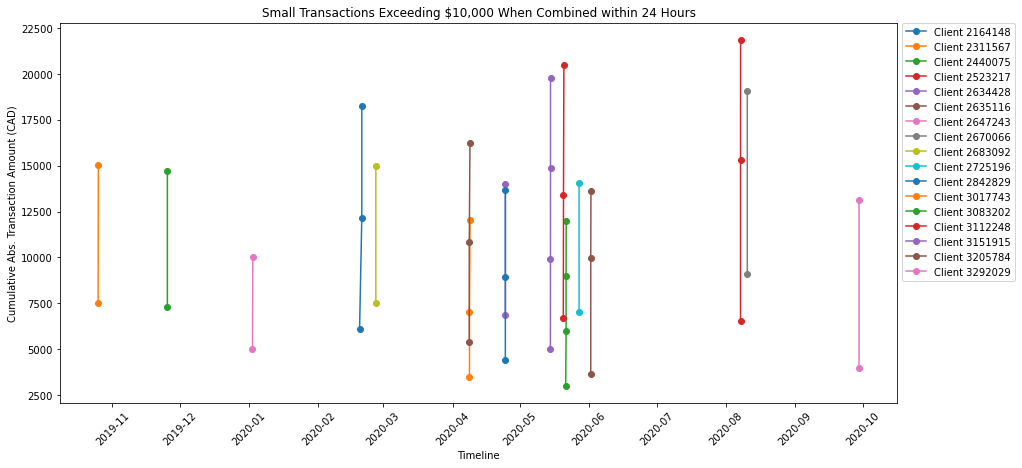

In [48]:
# Plotting combinations of transactions exceeding $10,000 by CIFs. Each marker/dot is a transaction. 
plt.figure(figsize=(15, 7))
for cif, group in tran_combinations_df.groupby('CIF'):
    plt.plot(group['EFFECTIVE_DATETIME'], group['CAD_AMOUNT_ABS'].cumsum(), marker='o', label=f'Client {cif}')
plt.xlabel('Timeline')
plt.ylabel('Cumulative Abs. Transaction Amount (CAD)')
plt.title('Small Transactions Exceeding $10,000 When Combined within 24 Hours')
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.66))
plt.show()

# There are 17 clients with such combinations in the audit period.

In [49]:
# Prepare to merge the results from the two tasks
# to have the complete EFT-SWIFT transactions that must be reported to FINTRAC
single_transactions_df = single_transactions_df.reset_index()
single_transactions_df.rename(columns={'index': 'ORIGINAL_INDEX'}, inplace=True)
single_transactions_df.rename(columns={'DATETIME': 'EFFECTIVE_DATETIME'}, inplace=True)
columns = ['ORIGINAL_INDEX','CIF','EFFECTIVE_DATE','EFFECTIVE_DATETIME','TRANSACTION_AMOUNT','TRANSACTION_AMOUNT_ABS','CAD_AMOUNT_ABS','TRANSACTION_CODE','TRANSACTION_DESCRIPTION','TIME_SEQ']

In [50]:
# Merge the results
must_report_df = pd.concat([single_transactions_df[columns], tran_combinations_df[columns]])
must_report_df

,ORIGINAL_INDEX,CIF,EFFECTIVE_DATE,EFFECTIVE_DATETIME,TRANSACTION_AMOUNT,TRANSACTION_AMOUNT_ABS,CAD_AMOUNT_ABS,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ
0,14,2462805,2020-07-24,2020-07-24 11:46:44,16161.13,16161.13,16161.13,CM,International Wire,11:46:44
1,56,2674126,2020-07-13,2020-07-13 11:11:07,-13200.00,13200.00,13200.00,DM,International Wire,11:11:07
2,70,2149604,2020-07-16,2020-07-16 15:50:45,-27549.56,27549.56,27549.56,DM,International Wire,15:50:45
3,106,2638391,2020-07-16,2020-07-16 09:57:21,-15937.00,15937.00,15937.00,DM,International Wire,09:57:21
4,298,3292029,2020-07-30,2020-07-30 11:01:12,28724.61,28724.61,28724.61,CM,International Wire,11:01:12
...,...,...,...,...,...,...,...,...,...,...
40,74842,3205784,2020-04-08,2020-04-08 08:29:18,-5400.54,5400.54,5400.54,CM,REV International Wire,08:29:18
41,74841,3205784,2020-04-08,2020-04-08 08:30:27,5413.21,5413.21,5413.21,CM,International Wire,08:30:27
42,75297,3205784,2020-04-08,2020-04-08 15:49:06,5400.54,5400.54,5400.54,CM,International Wire,15:49:06
43,136589,3292029,2020-09-29,2020-09-29 09:53:44,3977.09,3977.09,3977.09,CM,International Wire,09:53:44


In [51]:
# Load the FINTRAC reported dataset. As mentioned, I don't publicly make the dataset avaiable. This workbook is a work sample.
reported_df = pd.read_excel('fintrac_reported.xlsx')
reported_df.shape

(867, 8)

In [52]:
reported_df.head()

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID
0,EFTO2019080100001001,2019-08-01,EFTO,2019-07-30,153443,28000.0,CAD,2286141
1,EFTO2019080100001002,2019-08-01,EFTO,2019-07-30,153443,10000.0,CAD,2456977
2,EFTO2019080100001003,2019-08-01,EFTO,2019-07-31,132351,23690.0,USD,3182054
3,EFTO2019080200001001,2019-08-02,EFTO,2019-08-01,154452,20000.0,CAD,3193091
4,EFTO2019080600001001,2019-08-06,EFTO,2019-08-02,134746,33436.0,CAD,2911297


In [53]:
reported_df.tail()

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID
862,EFTI2020092400002002,2020-09-24,EFTI,2020-09-22,0,20432.96,CAD,2381375
863,EFTI2020092500001001,2020-09-25,EFTI,2020-09-23,0,32573.68,CAD,2462805
864,EFTI2020092500001002,2020-09-25,EFTI,2020-09-22,0,4913.93,CAD,3221652
865,EFTI2020092500001003,2020-09-25,EFTI,2020-09-23,0,59999.73,CAD,3221652
866,EFTO2020092900001001,2020-09-29,EFTO,2020-09-25,153645,20200.00,CAD,2954196


In [54]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(reported_df.isnull().sum())


Missing Values in Each Column:
Report Ref     0
Filing Date    0
Report Type    0
Tran Date      0
Tran Time      0
Tran Amt       0
Tran Cur       0
Client ID      0
dtype: int64


In [55]:
reported_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Report Ref   867 non-null    object 
 1   Filing Date  867 non-null    object 
 2   Report Type  867 non-null    object 
 3   Tran Date    867 non-null    object 
 4   Tran Time    867 non-null    int64  
 5   Tran Amt     867 non-null    float64
 6   Tran Cur     867 non-null    object 
 7   Client ID    867 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 54.3+ KB


In [56]:
# Convert dates to datetime format and convert Tran Time from int64 to time text
reported_df['Filing Date'] = pd.to_datetime(reported_df['Filing Date'])
reported_df['Tran Date'] = pd.to_datetime(reported_df['Tran Date'])
reported_df['Tran Time'] = pd.to_datetime(reported_df['Tran Time'].astype(str).str.zfill(6), format='%H%M%S').dt.time

In [57]:
reported_df.head()

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID
0,EFTO2019080100001001,2019-08-01,EFTO,2019-07-30,15:34:43,28000.0,CAD,2286141
1,EFTO2019080100001002,2019-08-01,EFTO,2019-07-30,15:34:43,10000.0,CAD,2456977
2,EFTO2019080100001003,2019-08-01,EFTO,2019-07-31,13:23:51,23690.0,USD,3182054
3,EFTO2019080200001001,2019-08-02,EFTO,2019-08-01,15:44:52,20000.0,CAD,3193091
4,EFTO2019080600001001,2019-08-06,EFTO,2019-08-02,13:47:46,33436.0,CAD,2911297


In [58]:
# Let's see what the time period matches with the audit period
print("Time Period: {} to {}".format(reported_df['Tran Date'].dt.date.min(), reported_df['Tran Date'].dt.date.max()))

Time Period: 2019-07-30 to 2020-09-25


In [59]:
# The FINTRAC reported dataset contains transactions outside of the audit period Oct 2019 to Sep 2020.
# Filter for reported transactions in the audit period only before comparing with the raw_eft_data dataset.
reported_df = reported_df[(reported_df['Tran Date'].dt.date >= df['EFFECTIVE_DATE'].dt.date.min()) & (reported_df['Tran Date'].dt.date <= df['EFFECTIVE_DATE'].dt.date.max())]
reported_df.shape

(771, 8)

In [60]:
# Check for unique values in categorical columns
print("\nUnique Values in Categorical Columns:\n")
print(reported_df['Report Type'].value_counts())
print("\n")
print(reported_df['Tran Cur'].value_counts())


Unique Values in Categorical Columns:

EFTO    398
EFTI    373
Name: Report Type, dtype: int64


CAD    699
USD     72
Name: Tran Cur, dtype: int64


### Test Scenario 1: Verify that the audit client reported EFT-SWIFT transactions timely (reporting date is expected to be the same as transaction date)

In [61]:
# Test Scenario 1: Verify that the audit client reported EFT-SWIFT transactions timely
# (reporting date is expected to be the same as transaction date)

# This means the reported_df['Filing Date'] must be equal to reported_df['Tran Date'].
not_timely_df = reported_df[(reported_df['Filing Date'].dt.date != reported_df['Tran Date'].dt.date)]
print("The following {} EFT-SWIFT transactions are not reported timely:\n".format(len(not_timely_df)))
not_timely_df

The following 762 EFT-SWIFT transactions are not reported timely:



,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID
96,EFTO2019100300001001,2019-10-03,EFTO,2019-10-01,15:41:08,10200.00,USD,3182054
97,EFTO2019100300001002,2019-10-03,EFTO,2019-10-02,10:48:44,167444.00,CAD,2374750
98,EFTO2019100300001003,2019-10-03,EFTO,2019-10-02,14:08:52,18693.00,CAD,2529565
99,EFTO2019100300001004,2019-10-03,EFTO,2019-10-02,14:08:52,16844.00,CAD,2463171
100,EFTI2019100400001001,2019-10-04,EFTI,2019-10-02,00:00:00,12571.00,CAD,2555646
...,...,...,...,...,...,...,...,...
862,EFTI2020092400002002,2020-09-24,EFTI,2020-09-22,00:00:00,20432.96,CAD,2381375
863,EFTI2020092500001001,2020-09-25,EFTI,2020-09-23,00:00:00,32573.68,CAD,2462805
864,EFTI2020092500001002,2020-09-25,EFTI,2020-09-22,00:00:00,4913.93,CAD,3221652
865,EFTI2020092500001003,2020-09-25,EFTI,2020-09-23,00:00:00,59999.73,CAD,3221652


In [62]:
# Save the result to csv
not_timely_df.to_csv('not_timely.csv', index=False)

### Test Scenario 2: Verify that the audit client reported EFT-SWIFT transactions accurately

In [63]:
# Test Scenario 2: Verify that the audit client reported EFT-SWIFT transactions accurately

# There are no unique columns to perform transaction mapping between the 771 transactions reported in the audit period
# and the raw data.
# In this case, combinations of different columns can be used.
# First, try the concatenation of 'Client ID', 'Tran Date', 'Tran Amt', and 'Report Type' of the fintrac_reported dataset.
# The equivalent of that concatenation in the raw data set is 'CIF', 'EFFECTIVE_DATE', 'TRANSACTION_AMOUNT',
# and 'TRANSACTION_CODE' 

reported_df['CIF_Date_Amount_Tran_Code'] = reported_df['Client ID'].astype(str) + reported_df['Tran Date'].astype(str) + reported_df['Tran Amt'].abs().astype(str) + reported_df['Report Type']
    
must_report_df['CIF_Date_Amount_Tran_Code'] = np.where(must_report_df['TRANSACTION_CODE']=='CM',
                                             must_report_df['CIF'].astype(str) + must_report_df['EFFECTIVE_DATE'].astype(str) + must_report_df['TRANSACTION_AMOUNT_ABS'].astype(str) + 'EFTI',
                                             must_report_df['CIF'].astype(str) + must_report_df['EFFECTIVE_DATE'].astype(str) + must_report_df['TRANSACTION_AMOUNT_ABS'].astype(str) + 'EFTO'
                                            )

df['CIF_Date_Amount_Tran_Code'] = np.where(df['TRANSACTION_CODE']=='CM',
                                             df['CIF'].astype(str) + df['EFFECTIVE_DATE'].astype(str) + df['TRANSACTION_AMOUNT_ABS'].astype(str) + 'ETFI',
                                             df['CIF'].astype(str) + df['EFFECTIVE_DATE'].astype(str) + df['TRANSACTION_AMOUNT_ABS'].astype(str) + 'ETFO'
                                            )



In [64]:
# Check if such concatenation is unique in the fintrac_reported dataset.
reported_df['CIF_Date_Amount_Tran_Code'].is_unique

True

In [65]:
# Check how many transactions match exactly transaction dates and amounts 
reported_df['CIF_Date_Amount_Tran_Code'].isin(must_report_df['CIF_Date_Amount_Tran_Code']).sum()

455

In [66]:
report_refs_1 = reported_df[reported_df['CIF_Date_Amount_Tran_Code'].isin(must_report_df['CIF_Date_Amount_Tran_Code'])]['Report Ref']
len(report_refs_1)

455

In [67]:
# 455 is quite a low match result given the 771 transactions reported in the audit period/
# Try matching again but this time the transaction amounts are rounded to the unit.
def round_to_unit(num):
    if (np.ceil(num) - num) == 0.5:
        return np.ceil(num)
    else:
        return np.round(num) 
    
reported_df['CIF_Date_Amount_Tran_Code'] = reported_df['Client ID'].astype(str) + reported_df['Tran Date'].astype(str) + reported_df['Tran Amt'].abs().apply(round_to_unit).astype(str) + reported_df['Report Type']
    
must_report_df['CIF_Date_Amount_Tran_Code'] = np.where(must_report_df['TRANSACTION_CODE']=='CM',
                                             must_report_df['CIF'].astype(str) + must_report_df['EFFECTIVE_DATE'].astype(str) + must_report_df['TRANSACTION_AMOUNT_ABS'].apply(round_to_unit).astype(str) + 'EFTI',
                                             must_report_df['CIF'].astype(str) + must_report_df['EFFECTIVE_DATE'].astype(str) + must_report_df['TRANSACTION_AMOUNT_ABS'].apply(round_to_unit).astype(str) + 'EFTO'
                                                      )



In [68]:
# Check if such concatenation is unique in the fintrac_reported dataset.
reported_df['CIF_Date_Amount_Tran_Code'].is_unique

True

In [69]:
# Check how many transactions match exactly transaction dates and rounded amounts 
reported_df['CIF_Date_Amount_Tran_Code'].isin(must_report_df['CIF_Date_Amount_Tran_Code']).sum()

683

In [70]:
report_refs_2 = reported_df[reported_df['CIF_Date_Amount_Tran_Code'].isin(must_report_df['CIF_Date_Amount_Tran_Code'])]['Report Ref']
len(report_refs_2)

683

In [71]:
# The number of matched transactions increases from 455 to 683 (with the difference of 228 due to rounded numbers)
# Save the 228 transactions to csv (matched transaction dates but having rounded amounts reported)
rounded_amounts_df = reported_df[reported_df['Report Ref'].isin(report_refs_2)]
rounded_amounts_df = rounded_amounts_df[~rounded_amounts_df['Report Ref'].isin(report_refs_1)]
rounded_amounts_df.to_csv('rounded_transaction_amounts.csv', index=False)
len(rounded_amounts_df)

228

In [72]:
# Filter for those not matching exactly transaction dates or rounded amounts
remaining_df = reported_df[~reported_df['CIF_Date_Amount_Tran_Code'].isin(must_report_df['CIF_Date_Amount_Tran_Code'])].copy()
remaining_df

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID,CIF_Date_Amount_Tran_Code
96,EFTO2019100300001001,2019-10-03,EFTO,2019-10-01,15:41:08,10200.00,USD,3182054,31820542019-10-0110200.0EFTO
111,EFTO2019100800001002,2019-10-08,EFTO,2019-10-03,13:57:27,19011.00,CAD,2470932,24709322019-10-0319011.0EFTO
112,EFTO2019100800001003,2019-10-08,EFTO,2019-10-03,10:48:05,13523.00,CAD,3069741,30697412019-10-0313523.0EFTO
129,EFTO2019101700001001,2019-10-17,EFTO,2019-10-10,10:47:25,10665.00,CAD,2774044,27740442019-10-1010665.0EFTO
133,EFTO2019101700001005,2019-10-17,EFTO,2019-10-16,14:00:25,2487.00,CAD,3034341,30343412019-10-162487.0EFTO
...,...,...,...,...,...,...,...,...,...
831,EFTO2020091000001001,2020-09-10,EFTO,2020-09-03,14:00:47,19093.20,CAD,3189105,31891052020-09-0319093.0EFTO
848,EFTO2020091800001002,2020-09-18,EFTO,2020-09-16,13:46:17,58688.91,CAD,2621999,26219992020-09-1658689.0EFTO
855,EFTO2020092200002001,2020-09-22,EFTO,2020-09-17,13:48:28,47601.00,CAD,2073750,20737502020-09-1747601.0EFTO
858,EFTO2020092300001002,2020-09-23,EFTO,2020-09-21,13:40:39,126802.87,CAD,3070027,30700272020-09-21126803.0EFTO


In [73]:
# Filter for those not matching exactly transaction dates but matching rounded amounts
remaining_df['CIF_Amount_Tran_Code'] = remaining_df['Client ID'].astype(str) + remaining_df['Tran Amt'].abs().apply(round_to_unit).astype(str) + remaining_df['Report Type']
    
must_report_df['CIF_Amount_Tran_Code'] = np.where(must_report_df['TRANSACTION_CODE']=='CM',
                                             must_report_df['CIF'].astype(str) + must_report_df['TRANSACTION_AMOUNT_ABS'].apply(round_to_unit).astype(str) + 'EFTI',
                                             must_report_df['CIF'].astype(str) + must_report_df['TRANSACTION_AMOUNT_ABS'].apply(round_to_unit).astype(str) + 'EFTO'
                                                 )

df['CIF_Amount_Tran_Code'] = np.where(df['TRANSACTION_CODE']=='CM',
                                             df['CIF'].astype(str) + df['TRANSACTION_AMOUNT_ABS'].apply(round_to_unit).astype(str) + 'EFTI',
                                             df['CIF'].astype(str) + df['TRANSACTION_AMOUNT_ABS'].apply(round_to_unit).astype(str) + 'EFTO'
                                     )

remaining_df['CIF_Amount_Tran_Code'].isin(must_report_df['CIF_Amount_Tran_Code']).sum()

72

In [74]:
# 72 transactions not matching transactions dates but matching rounded amounts, leaving the remaining unmatched to 16.
# Save the 72 transactions to csv
remaining_df[remaining_df['CIF_Amount_Tran_Code'].isin(must_report_df['CIF_Amount_Tran_Code'])].to_csv('different_tran_dates_and_rounded_amounts.csv', index=False)

# Now filter for the remaining 16
remaining_df = remaining_df[~remaining_df['CIF_Amount_Tran_Code'].isin(must_report_df['CIF_Amount_Tran_Code'])]
remaining_df

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID,CIF_Date_Amount_Tran_Code,CIF_Amount_Tran_Code
96,EFTO2019100300001001,2019-10-03,EFTO,2019-10-01,15:41:08,10200.00,USD,3182054,31820542019-10-0110200.0EFTO,318205410200.0EFTO
133,EFTO2019101700001005,2019-10-17,EFTO,2019-10-16,14:00:25,2487.00,CAD,3034341,30343412019-10-162487.0EFTO,30343412487.0EFTO
162,EFTI2019102800002005,2019-10-28,EFTI,2019-10-23,00:00:00,9900.00,CAD,2764790,27647902019-10-239900.0EFTI,27647909900.0EFTI
227,EFTI2019112500001002,2019-11-25,EFTI,2019-11-21,00:00:00,53842.00,CAD,2253557,22535572019-11-2153842.0EFTI,225355753842.0EFTI
264,EFTO2019120900002002,2019-12-09,EFTO,2019-12-06,10:48:10,4062.00,CAD,2991979,29919792019-12-064062.0EFTO,29919794062.0EFTO
342,EFTI2020011000002002,2020-01-10,EFTI,2020-01-08,00:00:00,8553.00,CAD,2438530,24385302020-01-088553.0EFTI,24385308553.0EFTI
359,EFTI2020011500002002,2020-01-15,EFTI,2020-01-13,00:00:00,7290.00,CAD,2429120,24291202020-01-137290.0EFTI,24291207290.0EFTI
466,EFTO2020030200001003,2020-03-02,EFTO,2020-02-27,16:04:52,1025.00,CAD,3207919,32079192020-02-271025.0EFTO,32079191025.0EFTO
467,EFTO2020030200001004,2020-03-02,EFTO,2020-02-28,13:36:43,61370.00,CAD,2052532,20525322020-02-2861370.0EFTO,205253261370.0EFTO
474,EFTO2020030300002001,2020-03-03,EFTO,2020-03-02,10:47:32,4112.00,CAD,3207919,32079192020-03-024112.0EFTO,32079194112.0EFTO


In [75]:
# Check if any of these is in the original raw dataset
remaining_df['CIF_Amount_Tran_Code'].isin(df['CIF_Amount_Tran_Code']).sum()


13

In [76]:
# Interestingly, 13 of them are not part of the must_report_df that I calculated but they are part of the original raw data.
# These 13 also need investigating. Save the 13 transactions to csv.
remaining_df[remaining_df['CIF_Amount_Tran_Code'].isin(df['CIF_Amount_Tran_Code'])].to_csv('not_part_of_algorithm_results.csv', index=False)

# Now filter for the remaining unmatched of 3 (16 - 13)
remaining_df = remaining_df[~remaining_df['CIF_Amount_Tran_Code'].isin(df['CIF_Amount_Tran_Code'])]
remaining_df

,Report Ref,Filing Date,Report Type,Tran Date,Tran Time,Tran Amt,Tran Cur,Client ID,CIF_Date_Amount_Tran_Code,CIF_Amount_Tran_Code
96,EFTO2019100300001001,2019-10-03,EFTO,2019-10-01,15:41:08,10200.0,USD,3182054,31820542019-10-0110200.0EFTO,318205410200.0EFTO
227,EFTI2019112500001002,2019-11-25,EFTI,2019-11-21,00:00:00,53842.0,CAD,2253557,22535572019-11-2153842.0EFTI,225355753842.0EFTI
467,EFTO2020030200001004,2020-03-02,EFTO,2020-02-28,13:36:43,61370.0,CAD,2052532,20525322020-02-2861370.0EFTO,205253261370.0EFTO


In [77]:
# Now search by each Client ID (CIF) to see if I can map the remaining 3 transactions manually with the raw data.

In [78]:
cols = ['CIF','EFFECTIVE_DATE','TRANSACTION_AMOUNT','TRANSACTION_CODE','TRANSACTION_DESCRIPTION','TIME_SEQ']
for id in remaining_df['Client ID'].unique():
    display(df[df['CIF']==id][cols])


,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ
123017,3182054,2020-08-13,-5000.0,DM,International Wire,14:06:45


,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ
14421,2253557,2019-11-06,5728.83,CM,International Wire,13:07:34
22917,2253557,2019-11-21,53841.06,CM,International Wire,12:20:15
52761,2253557,2020-02-04,829.51,CM,International Wire,09:22:11
61186,2253557,2020-02-26,6090.56,CM,International Wire,10:56:59
126878,2253557,2020-09-04,6212.96,CM,International Wire,11:20:38


,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ
61884,2052532,2020-02-28,-61368.76,DM,International Wire,14:31:59


In [79]:
# Scanning the raw data, I see the transaction EFTO2019100300001001 of Client ID 3182054 does not have a matching record
# , either by amount or by transaction date.
indexes = []
# Transaction EFTI2019112500001002 of Client ID 2253557 has a matching transaction date but inaccurate amount by appx. $1
# (53842.0 vs 53841.06)
indexes.append(22917) # Store the index of the matched/mapped transaction in the raw data set. 

# Transaction EFTO2020030200001004 of Client ID 2052532 has a matching transaction date but inaccurate amount by appx. $1
# (61370.0 vs 61368.76)
indexes.append(61884)


### Test Scenario 3: Verify that the audit client reported EFT-SWIFT transactions completely

In [81]:
must_report_df.shape

(938, 12)

In [82]:
# Check how many transactions in the must_report_df that I calculate are already in the fintrac_reported dataset
# which have the same transaction dates and rounded amounts
must_report_df['CIF_Date_Amount_Tran_Code'].isin(reported_df['CIF_Date_Amount_Tran_Code']).sum()

687

In [83]:
# Filter for the remaining and check how many transactions in the must_report_df 
# have different transaction dates and but the same rounded transaction amounts
must_report_df_remaining_df = must_report_df[~must_report_df['CIF_Date_Amount_Tran_Code'].isin(reported_df['CIF_Date_Amount_Tran_Code'])].copy()

reported_df['CIF_Amount_Tran_Code'] = reported_df['Client ID'].astype(str) + reported_df['Tran Amt'].abs().apply(round_to_unit).astype(str) + reported_df['Report Type']
must_report_df_remaining_df['CIF_Amount_Tran_Code'].isin(reported_df['CIF_Amount_Tran_Code']).sum()


82

In [84]:
# Filter for the remaining and excluding the 2 manually matched at the last step of Test Scenario 2.
must_report_df_remaining_df = must_report_df_remaining_df[~must_report_df_remaining_df['CIF_Amount_Tran_Code'].isin(reported_df['CIF_Amount_Tran_Code'])]
must_report_df_remaining_df[~must_report_df_remaining_df['ORIGINAL_INDEX'].isin(indexes)][cols]

,CIF,EFFECTIVE_DATE,TRANSACTION_AMOUNT,TRANSACTION_CODE,TRANSACTION_DESCRIPTION,TIME_SEQ
13,2458576,2020-07-27,52751.39,DM,REV International Wire,16:05:50
16,2643519,2019-10-01,10284.01,CM,International Wire,11:25:42
18,2190289,2019-10-01,36775.00,CM,International Wire,10:43:29
27,2216986,2019-10-03,243324.50,CM,International Wire,08:47:20
38,2458256,2019-10-08,15849.00,CM,International Wire,11:54:01
...,...,...,...,...,...,...
40,3205784,2020-04-08,-5400.54,CM,REV International Wire,08:29:18
41,3205784,2020-04-08,5413.21,CM,International Wire,08:30:27
42,3205784,2020-04-08,5400.54,CM,International Wire,15:49:06
43,3292029,2020-09-29,3977.09,CM,International Wire,09:53:44


In [85]:
# Save the missing transactions for further investigation
must_report_df_remaining_df[~must_report_df_remaining_df['ORIGINAL_INDEX'].isin(indexes)][cols].to_csv('must_report_transactions_not_in_fintrac_reported.csv', index=False)

### This is the end of the notebook. Thank you for reading.